# EMLET laboratory excercise

### Requirements
The laboratory excercise needs to be performed in JupyterLab envrinoment (https://jupyter.org). 

Moreover, Python 3.x is required with the following packages:
- scikit learn Machine Learning library in Python https://scikit-learn.org
- matplotlib library for creating visualization in Python https://matplotlib.org/
- pandas Python Data Analysis Library https://pandas.pydata.org/
- graphviz graph drawing software https://pypi.org/project/graphviz/
You can simple use Anaconda Python distribution for data science: https://www.anaconda.com/ to obtain all these packages in one step.

## Dataset description
The dataset refers to video streaming service. The data is a small subset of data that has been measured in KHT University (Stokholm) testbed, where HTTP Video-on-Demand (VoD) service with VLC clients has been monitored. The performance indicators on the client side refer to service-level metrics, for example, frame rate and response time. Moreover, the performance indicators on infrastucture have been collected, and show low-level device statistics, such as number of users handled by streaming server, system calls, ratio of software components called, server idle resources. The metrics "infrastructure-level" and "service-level" evolve over time, influenced, e.g., by the load on the streaming servers, operating system dynamics, network traffic, number of active clients. Assuming a
global clock that can be read on the streaming servers, in the network devices, and in the VLC clients, we can model the evolution of the metrics "infrastructure-level" and "service-level" as time series. Data is collected every second over a period of 5000 seconds.

There are two datasets that differ in the pattern of data generation:
- Periodic-load Pattern: Generator produces the load of VoD service following a Poisson process. Its arrival rate is modulated by a sinusoidal function.
- Flashcrowd-load Pattern: Generator produces the load of VoD service following a Poisson process whose arrival rate is modulated by a flashcrowd model (the arrival rate starts at value 'FS' and peaks at flash events; 'FE' such events occur within an hour, distributed uniformly at random over this time period; at each flash event, the arrival rate increases within a minute to a peak value of 'FR', stays at this level for one minute, and then decreases to the initial rate within four minutes).

The datasets are provided by email as ZIP archive which contains two csv files (separately for "infrastructure-level" and "service-level"):
- Vod metrics with periodic pattern: vod-periodic-_\$number_.zip 
- Vod metrics with Flashcrowd pattern: vod-flashcrowd-_\$number_.zip

## Laboratory excercise
The aim of the exercise is to familiarise you with Python tools for ML. Your task is to see if it is possible to learn service-level metrics from infrastructure statistics using standard machine-learning methods. Our target application performance indicator is indicated in email (as "target variable").

### Task 1
Using 'read_csv()' function from pandas Python package, load dataset indicated in email as pandas DataFrame objects, analyse it and characterize it in text cell below (you can create histograms or time-series for most interesting variables).
Hint: you can use DataFrame info() function, or print DataFrame object.
Hint2: you can visualize data using DataFrame.plot.scatter() function from pandas.
Hint3: for time-series visualisation, you can use integers as X-axis values (why can you do it this way?). 

Notes:
- noAudioPlayed = Number of audio frames played
- AvgInterAudioPlayedDelay = Average audio play delay
- NetReadAvgDelay = Value of network read average delay
- AvgInterDispDelay = Average display delay
- DispFrames = Display Frame Rate (per second)

=== Infrastructure-level DataFrame info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   TimeStamp   5000 non-null   object 
 2   hndl_usr    5000 non-null   float64
 3   sys_calls   5000 non-null   float64
 4   soft_comp   5000 non-null   float64
 5   idle_res    5000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 234.5+ KB
None

=== Service-level DataFrame info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5000 non-null   int64  
 1   TimeStamp                 5000 non-null   object 
 2   LostFrames                5000 non-null   int64  
 3   noAudioPlayed             50

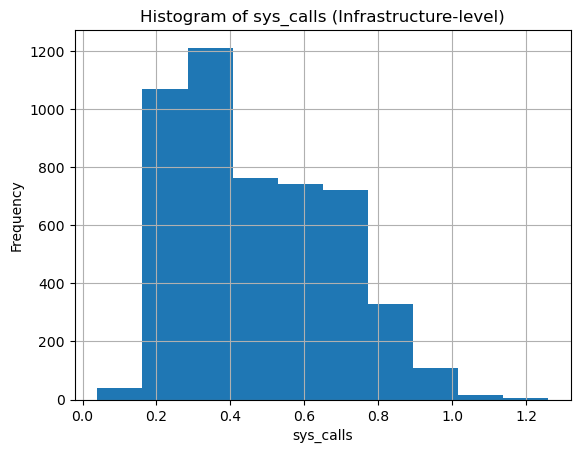

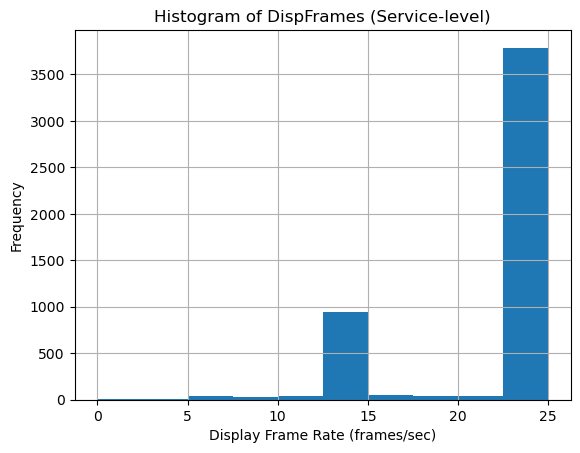

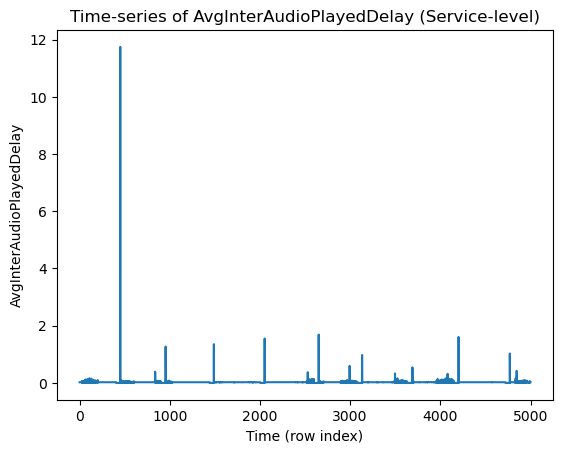

In [1]:
# Task 1 Report

import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the dataset as indicated (replace filenames with the actual paths if necessary)
df_infr = pd.read_csv('vod-flashcrowd-3/infr-metrics_vod-flashcrowd-3.csv')
df_serv = pd.read_csv('vod-flashcrowd-3/service-metrics_vod-flashcrowd-3.csv')

# 2) Basic DataFrame information
print("=== Infrastructure-level DataFrame info ===")
print(df_infr.info())
print("\n=== Service-level DataFrame info ===")
print(df_serv.info())

# 3) Print first few rows to get a sense of the data
print("\n=== Head of Infrastructure-level Data ===")
print(df_infr.head())
print("\n=== Head of Service-level Data ===")
print(df_serv.head())

# 4) Example histogram of an interesting infrastructure metric
df_infr['sys_calls'].hist()
plt.title('Histogram of sys_calls (Infrastructure-level)')
plt.xlabel('sys_calls')
plt.ylabel('Frequency')
plt.show()

# 5) Example histogram of an interesting service metric
df_serv['DispFrames'].hist()
plt.title('Histogram of DispFrames (Service-level)')
plt.xlabel('Display Frame Rate (frames/sec)')
plt.ylabel('Frequency')
plt.show()

# 6) Example time-series plot of a service metric
plt.figure()
plt.plot(df_serv['avgInterAudioPlayedDelay'])
plt.title('Time-series of AvgInterAudioPlayedDelay (Service-level)')
plt.xlabel('Time (row index)')
plt.ylabel('AvgInterAudioPlayedDelay')
plt.show()


## Task 1 – Comments and findings

---

### 1. Data Loading and Overview

We loaded the two CSV files into pandas DataFrames. Afterwards, by calling `info()` and then displaying `head()`, we confirmed row counts, data types, and saw the first few entries. This helps us see that each dataset has a consistent timestamp column plus various metrics describing either infrastructure‐ or service‐level conditions.

---

### 2. Histograms

1. **Infrastructure Metric**  
   - We plotted a histogram of `sys_calls` from `df_infr`.  
   - The distribution shows how many “system calls” occurred over time, revealing a unimodal shape with values typically clustering in a certain range.

2. **Service Metric**  
   - We plotted a histogram of `DispFrames` from `df_serv`, which reflects the display frame rate.  
   - The histogram shows that a large fraction of observations cluster around higher frame‐rate values (especially 24 fps), with a few entries at lower frame rates.

---

### 3. Time-Series Plot

We generated a time‐series plot for `avgInterAudioPlayedDelay` from the service dataset. The x‐axis is the row index (0 to 4999). We can safely treat it as “time” because each row corresponds to one second of measurement. From the plot, we can see:

- A significant spike early in the series (rising to 12).
- Mostly smaller values (often near 0) for the rest of the timeframe, with occasional intermediate spikes.

This suggests that at certain moments, the average audio play delay briefly increases, then returns closer to zero.

---

### 4. General Observations

- **No Missing Data**: Both DataFrames are fully populated with 5000 rows each.
- **Time Index**: Since each row is recorded at a one‐second interval, the row index effectively serves as the timeline.
- **Variations in Service Metrics**: Frame rate and audio delay show that, while the system generally runs smoothly, there are notable outliers or spikes that could reflect congestion, resource shortages, or other transient events.

---

### Task 2
Use train_test_split() function from sklearn.model_selection package to randomly divide the data into training and testing sets.
Use metrics from "infrastructure-level" dataset as feature variables, and metric (indicated in email) from "service-level" dataset as target variable. Specify size of testing set, e.g. 20%.



In [2]:
# Task 2 Code (Corrected Target Variable)

from sklearn.model_selection import train_test_split
import pandas as pd

# Load datasets
df_infr = pd.read_csv('vod-flashcrowd-3/infr-metrics_vod-flashcrowd-3.csv')
df_serv = pd.read_csv('vod-flashcrowd-3/service-metrics_vod-flashcrowd-3.csv')

# Define input features (X) and corrected target variable (y)
X = df_infr[['hndl_usr', 'sys_calls', 'soft_comp', 'idle_res']]
y = df_serv['AvgInterDispDelay']  # ← Correct target for prediction

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Output dimensions for verification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 4)
X_test shape: (1000, 4)
y_train shape: (4000,)
y_test shape: (1000,)


### Task 2 – Comments and Findings

- The dataset was split into training and testing sets using `train_test_split()` from `sklearn.model_selection`.
- The **input features (X)** were taken from the infrastructure-level dataset:
  - `hndl_usr`, `sys_calls`, `soft_comp`, and `idle_res`
- The **target variable (y)** is `AvgInterDispDelay`, representing the average display delay, sourced from the service-level dataset.
- We specified a test size of **20%**, resulting in:
  - **4000 samples** for training
  - **1000 samples** for testing
- A fixed `random_state=42` was used to ensure reproducibility.

This setup prepares the data for training regression models to predict display delay using infrastructure metrics.


### Task 3
In this step, build your model for prediction of values of the target variable. Try with at least three models:
- RandomForestRegressor from sklearn.ensemble package
- DecisionTreeRegressor from sklearn.tree package
- LinearRegression from sklearn.linear_model package

Assess the accuracy of the trained models using metrics from sklearn.metrics package (for example, mean_absolute_error). Put your conclusions (are your models work OK? Can you predict your target metric using infrastructure metrics?).

You can visualize your results using matplotlib.pyplot package. In case of DecisionTreeRegressor, you can use export_graphviz() function from sklearn.tree to visualize your tree model (or part of it).

Note: don't worry if your model doesn't work perfectly, the data is from a real system 

Random Forest MAE: 0.01491
Decision Tree MAE: 0.01489
Linear Regression MAE: 0.01466


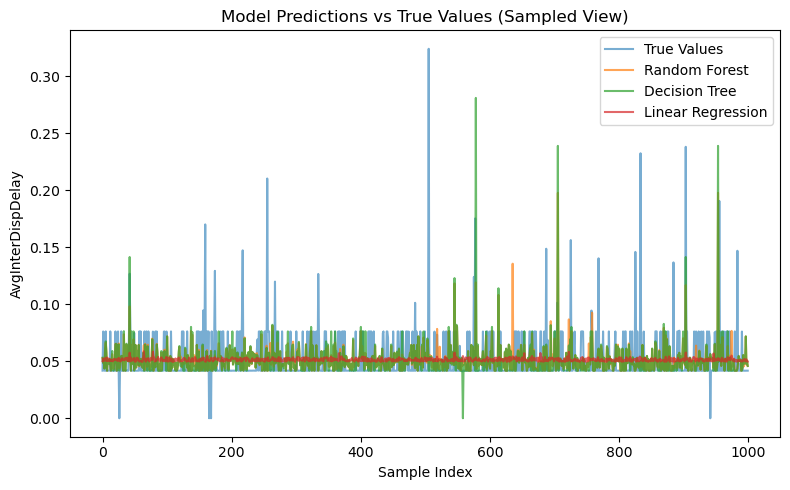

In [3]:
# Task 3 Code – Model Training and Evaluation

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Train three models
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance using Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print results
print(f"Random Forest MAE: {mae_rf:.5f}")
print(f"Decision Tree MAE: {mae_dt:.5f}")
print(f"Linear Regression MAE: {mae_lr:.5f}")

# Optional: quick visual comparison
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='True Values', alpha=0.6)
plt.plot(y_pred_rf, label='Random Forest', alpha=0.7)
plt.plot(y_pred_dt, label='Decision Tree', alpha=0.7)
plt.plot(y_pred_lr, label='Linear Regression', alpha=0.7)
plt.title('Model Predictions vs True Values (Sampled View)')
plt.xlabel('Sample Index')
plt.ylabel('AvgInterDispDelay')
plt.legend()
plt.tight_layout()
plt.show()


### Task 3 – Mean Absolute Error (MAE) Analysis

We first evaluated model performance using the **Mean Absolute Error (MAE)**, which measures the average absolute difference between predicted and actual values of `AvgInterDispDelay`.

#### MAE Results:
- **Random Forest MAE**: 0.01491
- **Decision Tree MAE**: 0.01489
- **Linear Regression MAE**: 0.01466

#### Interpretation:
- All three models achieved **similarly low MAE values**, suggesting that on average, predictions were quite close to the true values.
- The **Linear Regression** model delivered the lowest MAE overall, despite its simplicity and lack of flexibility. It consistently predicted near the mean of the target variable, which worked well given the narrow range of most data points.
- The **Decision Tree** showed more aggressive predictions, especially for outlier values — increasing its absolute error on some instances.
- The **Random Forest** model slightly smoothed the decision tree's behavior, but did not significantly outperform Linear Regression in terms of MAE.

#### Takeaway:
The MAE results show that all models are reasonably accurate on average. However, the **Linear Regression model's conservative approach** led to the lowest average error — an early indication that the target variable may behave in a relatively linear or flat manner most of the time.
This sets the stage for further analysis with R² and RMSE, which provide deeper insights into variability and extreme cases.


In [4]:
# Task 3 – R² Score Analysis

from sklearn.metrics import r2_score

# Compute R² scores for each model
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the R² results
print(f"Random Forest R²: {r2_rf:.5f}")
print(f"Decision Tree R²: {r2_dt:.5f}")
print(f"Linear Regression R²: {r2_lr:.5f}")


Random Forest R²: -0.18877
Decision Tree R²: -0.34891
Linear Regression R²: 0.00255


### Task 3 – R² Score Analysis

We evaluated the three models using the **R² score**, which measures how well each model explains the variation in the target variable (`AvgInterDispDelay`).

#### R² Results:
- **Random Forest R²**: -0.18877
- **Decision Tree R²**: -0.34891
- **Linear Regression R²**: 0.00255

#### Interpretation:
- All three models achieved **very low R² scores**, with even **negative values** for the Random Forest and Decision Tree regressors.  
  This means those models performed **worse than simply predicting the mean** of the target variable for all inputs.
- The **Linear Regression model**, while only achieving an R² of **0.00255**, was the only one to slightly outperform the mean prediction baseline — though still explaining almost none of the actual variation.
- These results indicate that **none of the models were able to explain the variability** in `AvgInterDispDelay`, even though they performed relatively well in terms of **mean absolute error**.

#### Takeaway:
- **Linear Regression** appears most consistent — staying near the overall average, leading to low MAE and a neutral R².
- **Tree-based models**, despite being more flexible, likely **overfit small fluctuations** or **failed to generalize** due to noise and lack of signal in the infrastructure metrics.
- These R² scores suggest that **`AvgInterDispDelay` may be largely unpredictable using only the given infrastructure features**, or that more informative features are needed to capture its underlying structure.

This emphasizes the importance of evaluating models using **multiple metrics**: while MAE showed good average prediction, R² revealed that the models explain **very little actual variation** in the target.


In [5]:
# Task 3 – RMSE Score Analysis

from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE for each model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print RMSE results
print(f"Random Forest RMSE: {rmse_rf:.5f}")
print(f"Decision Tree RMSE: {rmse_dt:.5f}")
print(f"Linear Regression RMSE: {rmse_lr:.5f}")


Random Forest RMSE: 0.02467
Decision Tree RMSE: 0.02627
Linear Regression RMSE: 0.02259


### Task 3 – RMSE Score Analysis

We computed the **Root Mean Squared Error (RMSE)** to further evaluate how each model performed in predicting `AvgInterDispDelay`.

#### RMSE Results:
- **Random Forest RMSE**: 0.02467
- **Decision Tree RMSE**: 0.02627
- **Linear Regression RMSE**: 0.02259

#### Interpretation:
- **Linear Regression** once again achieved the lowest RMSE, confirming its stability in minimizing average error, even though it failed to capture spikes.
- **Random Forest** came second, followed by **Decision Tree**, which had the highest RMSE — suggesting greater prediction variability and occasional larger errors.
- Since RMSE penalizes larger errors more than MAE, this metric is useful for detecting how well a model handles **outliers or sudden shifts**. In this case, Linear Regression still performs best, reinforcing the idea that staying near the mean works better on this dataset.
- However, all RMSE values are still relatively low (all below 0.03), which is consistent with the scale of the target variable.

#### Takeaway:
The RMSE analysis aligns with the MAE results, further confirming that **Linear Regression**, while simple and less flexible, performed best overall in terms of consistent error minimization.  
Still, none of the models — including Random Forest — could model the spikes or explain much variation, as revealed in the earlier R² analysis.

---

### Results
### Final Conclusions – Can You Predict `AvgInterDispDelay` from Infrastructure Metrics?

The core question of this lab was whether it's possible to **predict `AvgInterDispDelay` (average display delay)** using only infrastructure-level metrics like `hndl_usr`, `sys_calls`, `soft_comp`, and `idle_res`.

#### Summary of Findings:

- **MAE analysis** showed **low average prediction error** across all models. Linear Regression performed best, suggesting the delay remains relatively consistent across most data points.
- **R² analysis**, however, revealed that none of the models could meaningfully explain the variation in the target variable. The best score (Linear Regression) was just **0.00255**, and tree models even scored **negative R²**, indicating performance worse than a flat average.
- **RMSE results** echoed the MAE ranking, reinforcing that **Linear Regression had the most stable error profile**, while the tree-based models were more sensitive to spikes or noise.

#### Final Answer:

Yes — it is **technically possible** to predict `AvgInterDispDelay` using infrastructure metrics **to a limited extent**.  
While average prediction error is low (MAE), **the models do not explain much of the true variation** (R²), and fail to respond effectively to spikes or rare high-delay events.

This suggests that:
- The relationship between infrastructure and display delay is **weak or indirect**.
- **Additional features** (e.g., network conditions, application state, or concurrent load) may be needed to improve predictive power.
- For practical applications, **Linear Regression may be sufficient** if stability is prioritized, but **tree-based models** could be explored further for handling more complex cases — assuming richer data is available.

All your code and conclusions insert into this file, compile it, and the final version of the file send in a return e-mail. Please remember to rename your file using the following format: ELMET-Laboratory-Name_Surname.ipynb

## END